In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [161]:
def hot_encode_columns(original_df, columns):
    original_df = original_df.copy()
    
    print([*columns])
    encoded_df = pd.get_dummies(original_df.loc[:, columns])

    original_df = original_df.drop([*columns] , axis = 1) 
    return pd.concat([original_df,encoded_df], axis=1)
    

In [162]:
## SHow missing values

def show_missing_values(df: pd.DataFrame):
    

    fig, ax = plt.subplots(figsize=(20, 6))
    
    
    sns.heatmap(df.isnull(), cbar=False, ax=ax)
    
    
    plt.show()

In [163]:
train_df = pd.read_csv('./data/train.csv')

test_df = pd.read_csv('./data/test.csv')



In [164]:
train_df = hot_encode_columns(train_df, ['Sex', 'Embarked'])

test_df = hot_encode_columns(test_df, ['Sex', 'Embarked'])

['Sex', 'Embarked']
['Sex', 'Embarked']


In [165]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [166]:

train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)


test_df = test_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)

In [167]:
## Categorize the data



In [168]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


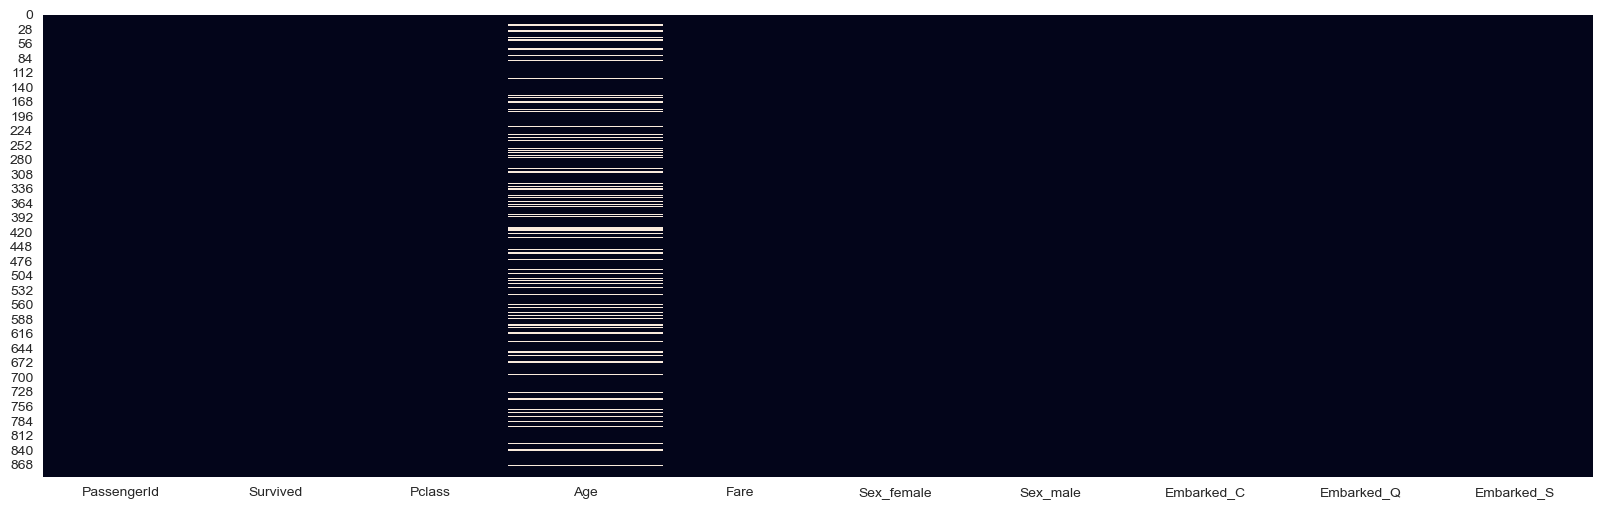

In [169]:
## SHow missing values

show_missing_values(train_df)

In [170]:
### I will impute data using MICE

def fill_missing_data_with_mice_imputer(df: pd.DataFrame):
        mice_imputer_df = df.copy()

        mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None,
                                        imputation_order='ascending')

        df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(mice_imputer_df), columns=mice_imputer_df.columns)

        return df_mice_imputed

In [171]:
train_df = fill_missing_data_with_mice_imputer(train_df)

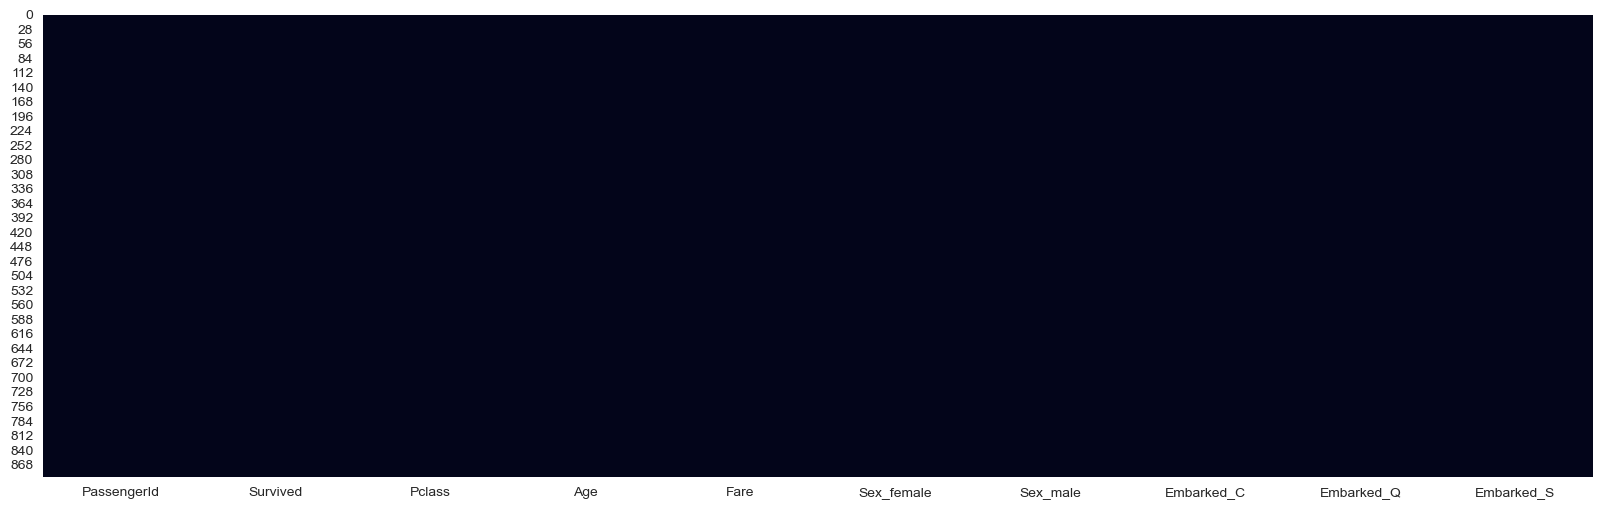

In [172]:
show_missing_values(train_df)

In [173]:
## Dataframe was successfully imputed


In [174]:
test_df= fill_missing_data_with_mice_imputer(test_df)

In [175]:


### Test model using Random Forest

X_train = train_df.drop(['Survived'] , axis =1 )

y_train = train_df['Survived']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [177]:



model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)




In [178]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8268156424581006


In [181]:
### Save submissions

submissions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': model.predict(test_df)})

submissions_df['PassengerId']  = submissions_df['PassengerId'].astype('int32')

submissions_df['Survived']  = submissions_df['Survived'].astype('int32')

submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int32
dtypes: int32(2)
memory usage: 3.4 KB


In [182]:
submissions_df.to_csv('./submissions/submission_2.csv', index=False)